In [1]:
import numpy as np
import pandas as pd
from scipy.stats import stats
from sklearn.linear_model import LinearRegression
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from time import process_time
import csv
import matplotlib.colors


In [12]:
# matrix_5000 = pd.read_csv('/Users/pmahableshwarkar/Documents/Depth_Project/spatial_perception_SUNRGBD/joint_analyses/avg_randSplitMatrix_n5000.csv')
matrix_5000 = pd.read_csv('/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/spatial_perception_SUNRGBD/joint_analyses/avg_randSplitMatrix_n5000.csv')

mean_df_corr = matrix_5000.set_index('Unnamed: 0')


In [13]:
bottom_mean_df_corr = mean_df_corr.tail(12)
bottom_mean_df_corr = bottom_mean_df_corr.drop(columns = ['r1_Discrim_PC_125', 'r1_Discrim_PC_250','r1_Discrim_PC_1000','r1_VE_PC_125', 'r1_VE_PC_250', 'r1_VE_PC_1000',
                                    'r1_Discrim 125 RT', 'r1_Discrim 250 RT','r1_Discrim 1000 RT', 'r1_VE 125 RT', 'r1_VE 250 RT', 'r1_VE 1000 RT'])

In [14]:
bottom_mean_df_corr

,r0_Discrim_PC_125,r0_Discrim_PC_250,r0_Discrim_PC_1000,r0_VE_PC_125,r0_VE_PC_250,r0_VE_PC_1000,r0_Discrim 125 RT,r0_Discrim 250 RT,r0_Discrim 1000 RT,r0_VE 125 RT,r0_VE 250 RT,r0_VE 1000 RT
Unnamed: 0,,,,,,,,,,,,
r1_Discrim_PC_125,0.845700,0.770401,0.698639,0.605170,0.582879,0.556789,-0.638179,-0.689445,-0.524439,-0.029749,-0.128175,-0.142736
r1_Discrim_PC_250,0.769487,0.790371,0.759993,0.614038,0.625507,0.626124,-0.615785,-0.669144,-0.577747,-0.074802,-0.171141,-0.180619
r1_Discrim_PC_1000,0.689110,0.755223,0.839597,0.573124,0.602451,0.646072,-0.554250,-0.639392,-0.558559,-0.102073,-0.177006,-0.177169
r1_VE_PC_125,0.605376,0.616807,0.579827,0.563263,0.548338,0.523525,-0.448032,-0.501056,-0.378422,0.030158,-0.028647,-0.015225
r1_VE_PC_250,0.583095,0.628077,0.608702,0.547969,0.549158,0.545678,-0.438043,-0.508773,-0.424335,0.001187,-0.074070,-0.061195
r1_VE_PC_1000,0.554127,0.631073,0.650623,0.522051,0.545801,0.574811,-0.434798,-0.512679,-0.432891,-0.056439,-0.150707,-0.125731
r1_Discrim 125 RT,-0.635199,-0.615788,-0.558383,-0.447441,-0.438530,-0.435083,0.817952,0.719764,0.600234,0.278896,0.313250,0.309818
r1_Discrim 250 RT,-0.689139,-0.667939,-0.643995,-0.499868,-0.508951,-0.512054,0.718125,0.785465,0.593849,0.197859,0.288110,0.314079
r1_Discrim 1000 RT,-0.526533,-0.577867,-0.563033,-0.380559,-0.426440,-0.435481,0.598010,0.592385,0.671548,0.300654,0.391734,0.356549


In [15]:
bottom_mean_df_corr = bottom_mean_df_corr.drop(columns=['r0_Discrim 125 RT', 'r0_Discrim 250 RT', 'r0_Discrim 1000 RT', 'r0_VE 125 RT', 'r0_VE 250 RT', 'r0_VE 1000 RT'])

In [16]:
PC_only_corr = bottom_mean_df_corr.drop(['r1_Discrim 125 RT', 'r1_Discrim 250 RT', 'r1_Discrim 1000 RT', 'r1_VE 125 RT', 'r1_VE 250 RT', 'r1_VE 1000 RT'])


In [17]:
PC_only_corr

,r0_Discrim_PC_125,r0_Discrim_PC_250,r0_Discrim_PC_1000,r0_VE_PC_125,r0_VE_PC_250,r0_VE_PC_1000
Unnamed: 0,,,,,,
r1_Discrim_PC_125,0.845700,0.770401,0.698639,0.605170,0.582879,0.556789
r1_Discrim_PC_250,0.769487,0.790371,0.759993,0.614038,0.625507,0.626124
r1_Discrim_PC_1000,0.689110,0.755223,0.839597,0.573124,0.602451,0.646072
r1_VE_PC_125,0.605376,0.616807,0.579827,0.563263,0.548338,0.523525
r1_VE_PC_250,0.583095,0.628077,0.608702,0.547969,0.549158,0.545678
r1_VE_PC_1000,0.554127,0.631073,0.650623,0.522051,0.545801,0.574811


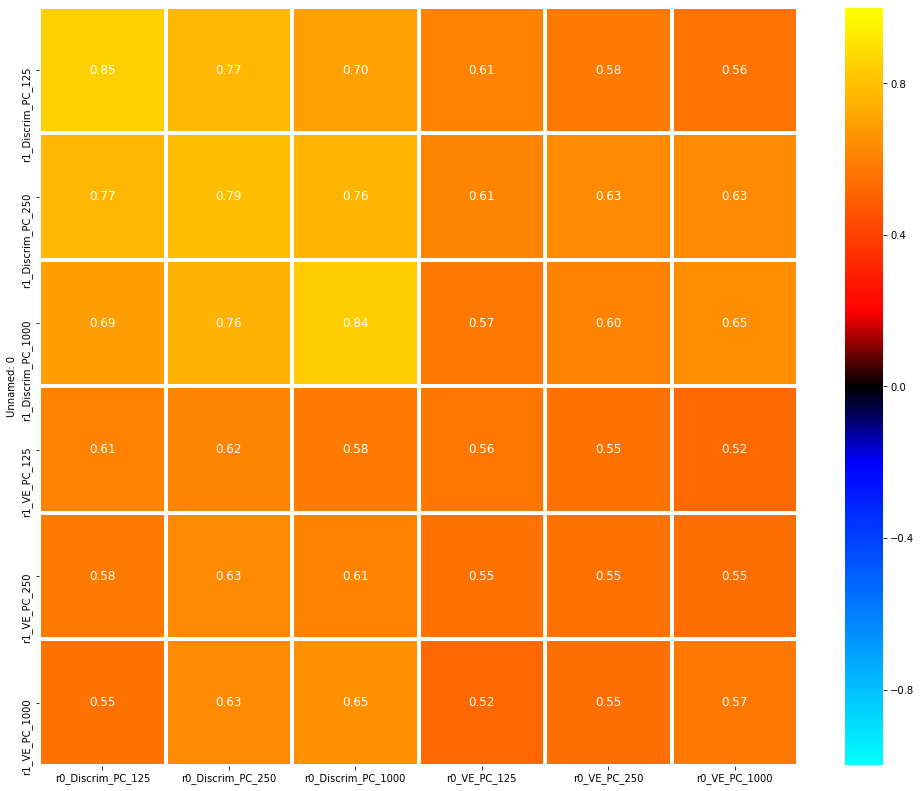

In [18]:
import matplotlib.colors

norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "aqua"],
          [norm(-0.2), "blue"],
          [norm(0), "black"],
          [norm( 0.2), "red"],
          [norm( 1.0), "yellow"]]


cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


plt.figure(figsize=[17,17])

ax = sns.heatmap(PC_only_corr, annot=True, fmt=".2f", cmap= cmap, square=True, center=0, vmin=-1, vmax=1, edgecolors='w', linewidths=3, cbar_kws={"shrink": .82}, annot_kws={'fontsize': 12, 'color': 'white'}) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


plt.savefig('PC_rand_5000.png', dpi=300)

plt.show();